In [1]:
#차원 축소 
#2차원을 1차원으로 (우리가 만든 벡터에 다 투영 시키기) 
#exd) (2,3) --> 한 축 위에 다 올라가게 되어있음 
#학습의 영역보다는 데이터를 골라내는 것 

In [3]:
import numpy as np

fru = np.load('data/fruits_300.npy')
fru_2d = fru.reshape(-1, 100*100)

In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50) #10,000개의 특성을 계속 압축해 나가는 것 
pca.fit(fru_2d)

PCA(n_components=50)

In [7]:
pca.components_.shape
#찾아준 것 

(50, 10000)

In [16]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    n = len(arr)

    rows = int(np.ceil(n/10))
    cols = n if rows < 2 else 10

    fig, axs = plt.subplots(rows, cols, figsize=(cols*ratio, rows*ratio), squeeze=False)

    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

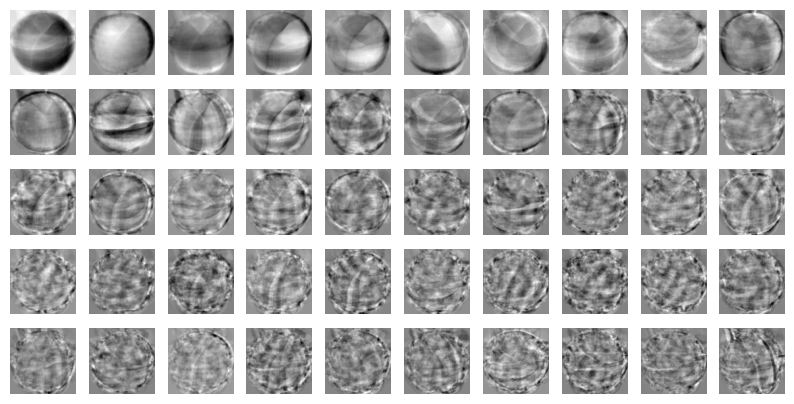

In [17]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

In [10]:
fru_2d.shape

(300, 10000)

In [12]:
fruits_pca = pca.transform(fru_2d)
fruits_pca.shape

(300, 50)

In [14]:
fruits_inverse = pca.inverse_transform(fruits_pca) #반대로 변형 시켜주는 것 
fruits_inverse.shape

(300, 10000)

In [15]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)

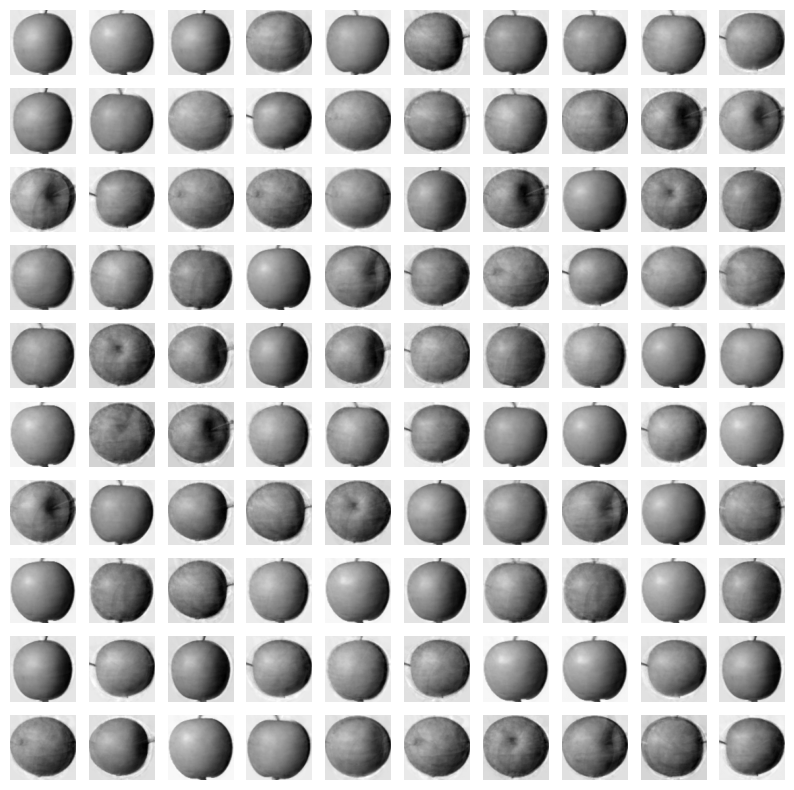

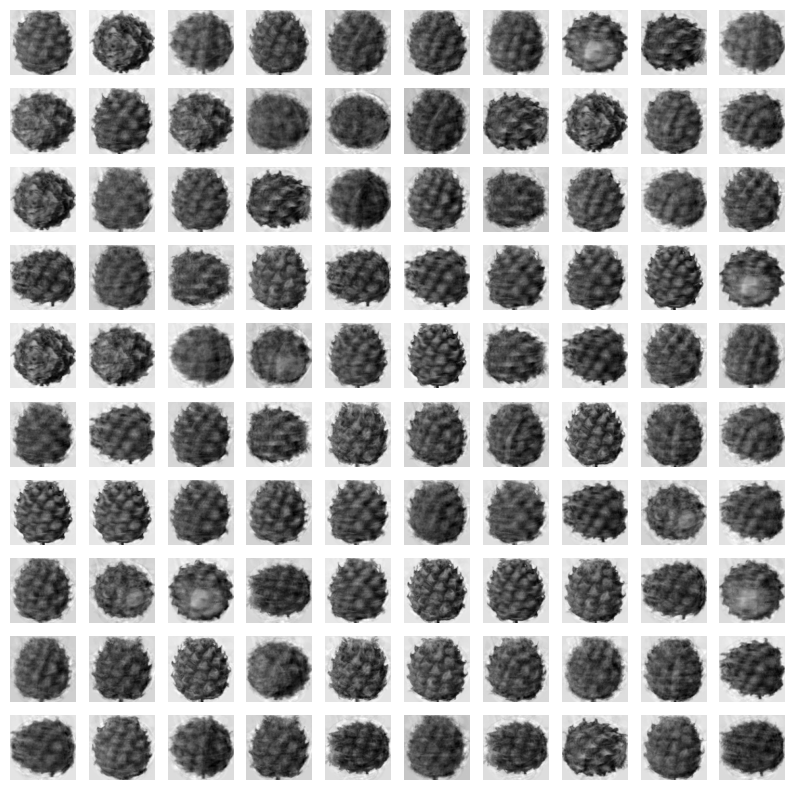

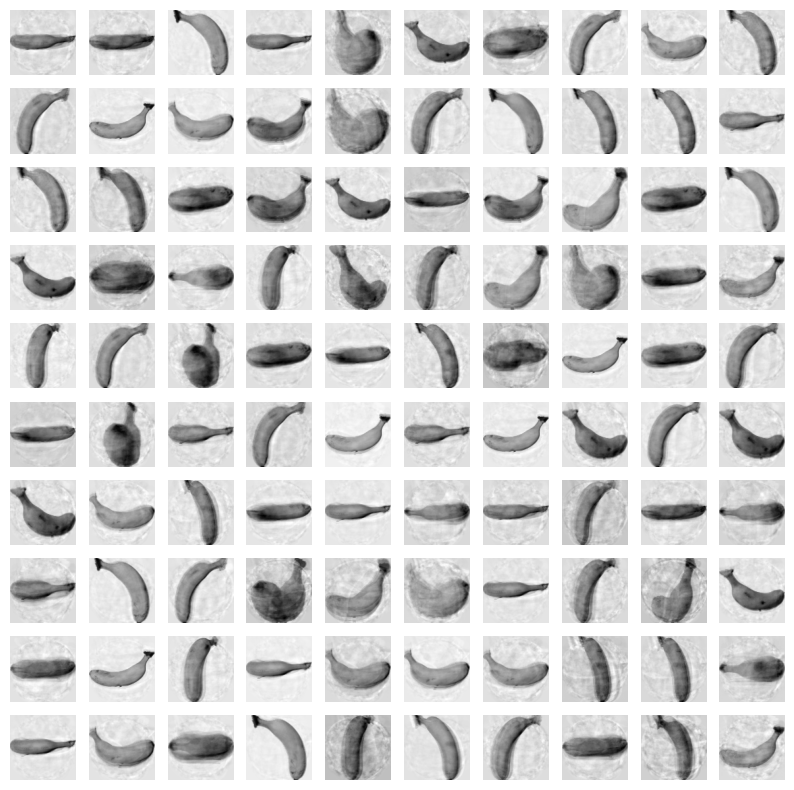

In [18]:
for start in [0, 100, 200]:
    draw_fruits(fruits_reconstruct[start:start+100])
    print("\n")

In [20]:
#설명된 분산
pca.explained_variance_ratio_
#점점 줄어드는 분산 값

array([0.42357017, 0.09941755, 0.06577863, 0.04031172, 0.03416875,
       0.03281329, 0.02573267, 0.02054963, 0.01372276, 0.01342773,
       0.01152146, 0.00944596, 0.00878232, 0.00846697, 0.00693049,
       0.00645188, 0.00578896, 0.00511202, 0.00486383, 0.00480347,
       0.00447837, 0.00437316, 0.00408035, 0.00389471, 0.00372437,
       0.0035929 , 0.00331465, 0.0031784 , 0.00304319, 0.00303743,
       0.00288931, 0.00275901, 0.00264963, 0.0025594 , 0.0025203 ,
       0.00247287, 0.00239574, 0.00230681, 0.00222177, 0.00216817,
       0.00214034, 0.00196536, 0.00192664, 0.0019032 , 0.00185088,
       0.00182924, 0.0017403 , 0.00168603, 0.00163688, 0.00159578])

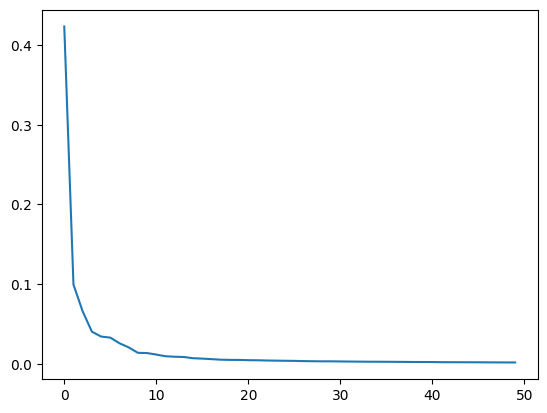

In [21]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

In [23]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [25]:
target = np.array([0]*100 + [1]*100 + [2]*100)
#지금은 데이터가 100개씩 나뉘는걸 아니까 타겟 데이터를 이렇게 쓰는 것 

In [28]:
from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fru_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))
      

0.9966666666666667
0.12448663711547851


In [30]:
from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))
#PCA로 데이터 차원 축소하면 저장공간도 줄어들고 처리 속도도 줄어든다. 정확도도 높아진다

0.9966666666666667
0.005206680297851563


In [32]:
pca = PCA(n_components=0.5)
pca.fit(fru_2d)
#분산이 50%에 달할 때까지 찾아달라는 뜻 

PCA(n_components=0.5)

In [34]:
print(pca.n_components_)
#50%가 될때까지 2개의 성분을 찾았다 

2


In [37]:
fruits_pca = pca.transform(fru_2d)
print(fruits_pca.shape)
#2개 주성분으로 변환된 데이터 

(300, 2)


In [39]:
#2개로 줄어도 변환이 될까 ? 
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.99
0.011452865600585938


C:\Users\2-23\Desktop\DMF\ML\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\2-23\Desktop\DMF\ML\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

In [44]:
#축소된 차원을 통해서 클러스터 찾기 
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state = 42)
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


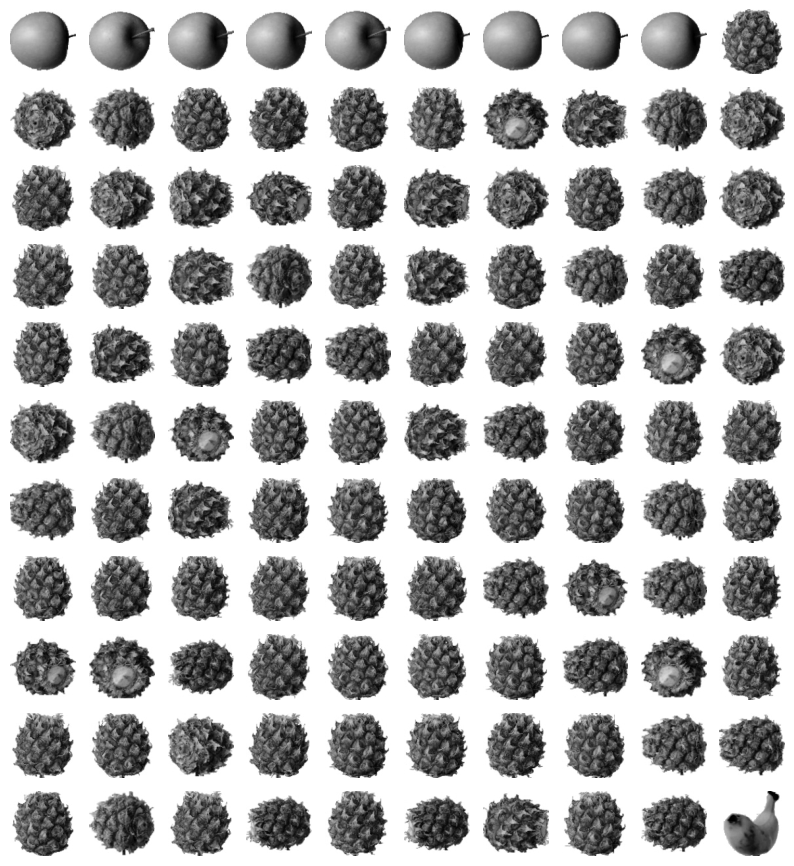

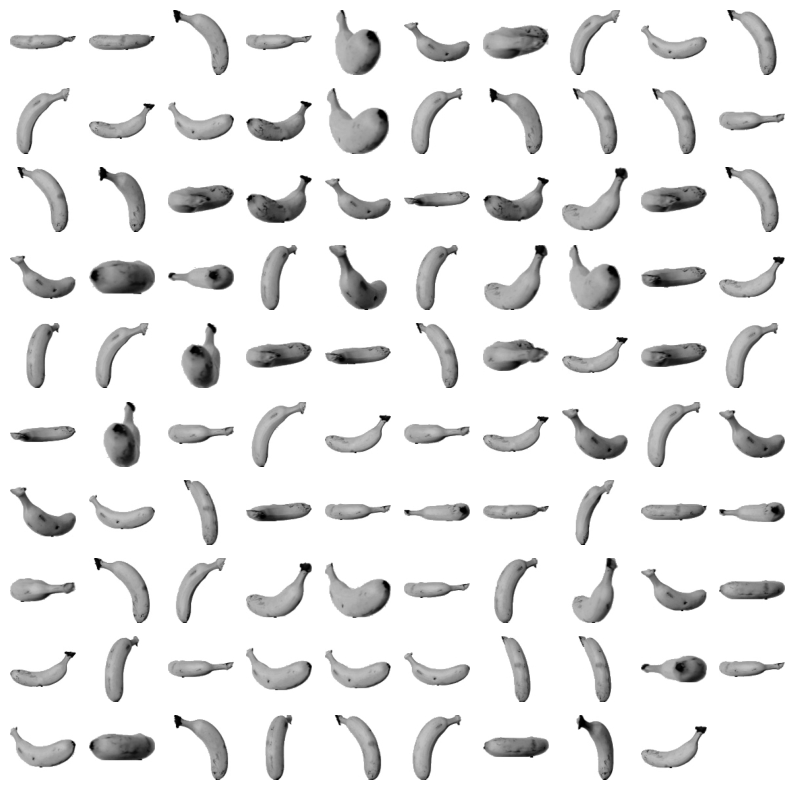

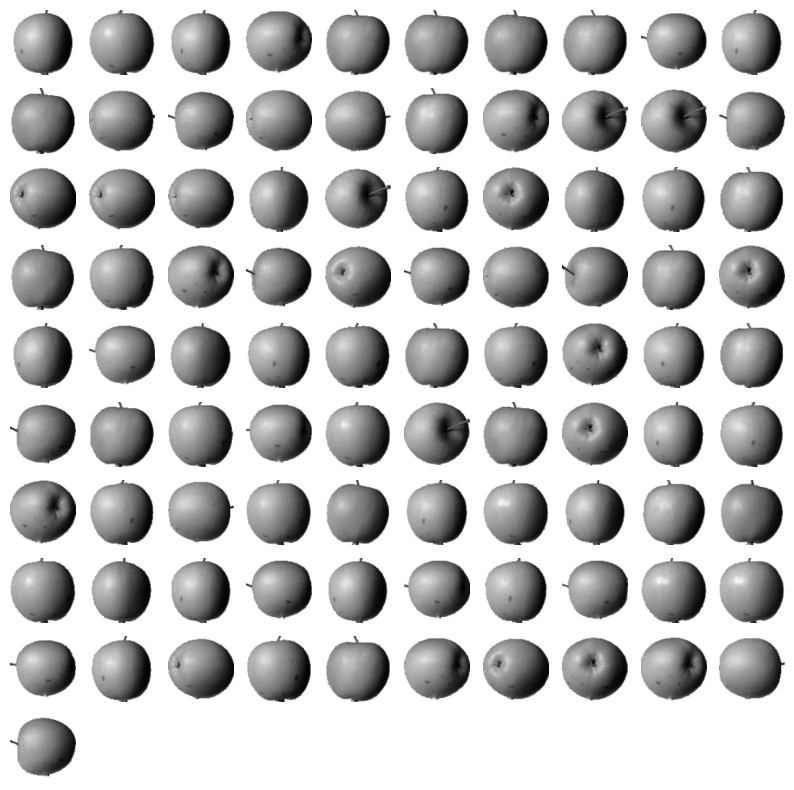

In [46]:
#KMeans를 통해 찾은 과일 이미지는 분류가 잘 됐을까 ? 
for label in range(0,3):
    draw_fruits(fru[km.labels_==label])
    print("\n")

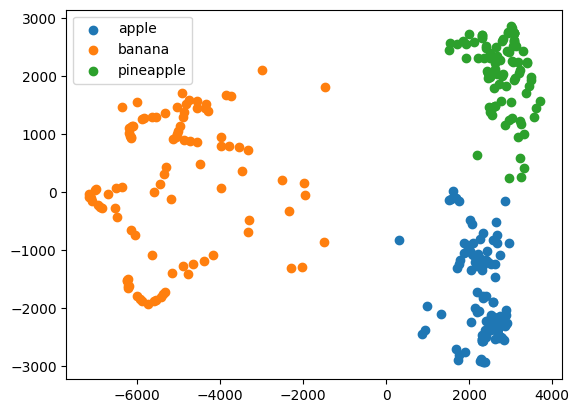

In [48]:
for label in range(0,3):
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:,0], data[:,1])
plt.legend(['apple','banana','pineapple'])
plt.show()